In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
SELECTED_LAS = ["E08000023", "E08000006", "E06000043"]
SHP_LOCATION = "./UK_LocalDistrictAuthorities2023/LAD_MAY_2023_UK_BFC.shp"

In [12]:
shp = gpd.read_file(SHP_LOCATION)

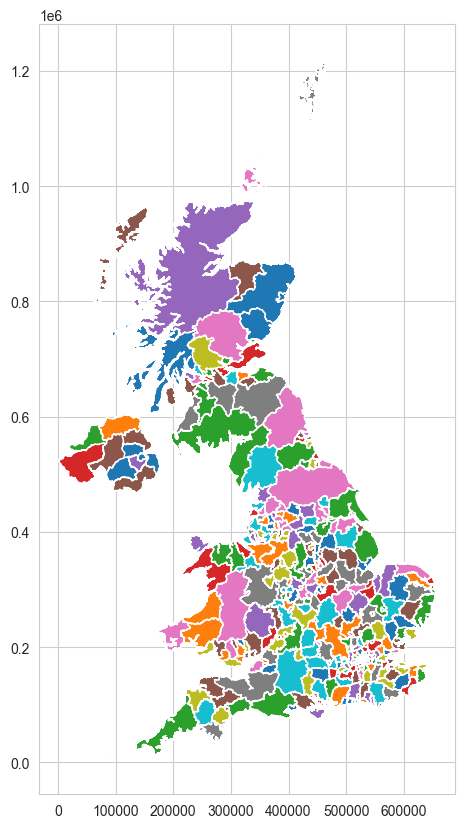

In [13]:
fig,ax = plt.subplots(figsize=(18,10))
shp.plot(ax=ax, column="LAD23NM", legend=False)
plt.show()

In [14]:
for i in range(len(shp)):
    if shp.loc[i, "LAD23CD"] not in SELECTED_LAS: continue
    code = shp.loc[i, "LAD23CD"]
    name = shp.loc[i, "LAD23NM"]
    shp.to_crs(epsg="27700")
    print(code + "_" + name)
    shp.loc[[i]].to_file("Selected_Shapefiles/"+code+"_"+name+".shp")

E06000043_Brighton and Hove
E08000006_Salford
E08000023_South Tyneside


In [15]:
shp.loc[0, "geometry"].area

93717028.46826309

In [16]:
relevant_records = [record for record in shp.records() if record[0] in SELECTED_LAS]
relevant_records

AttributeError: 'GeoDataFrame' object has no attribute 'records'

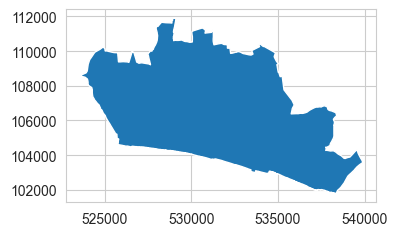

In [19]:
shapefile = gpd.read_file("Selected_Shapefiles/E06000043_Brighton and Hove.shp")
fig, ax = plt.subplots(figsize=(4,4))
shapefile.plot(ax=ax)
plt.show()